<div style="text-align: left"><H1><font color=darkblue> Multiple Stocks Analysis   </font></H1></div>
<div style="text-align: left"><H4><font color=black>Produced By: Driss Baraket </font></H4></div>

<div style="text-align: center"><H3><font color=green> The General Objective in the Analysis is: </font></H3></div>
<div style="text-align: center"><H3><font color=green> nalyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2021. </font></H3></div>
 

### Part 0: Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web

## Important
import requests_cache
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after= 'CachedSession.expire_after')
# just add headers to your session and provide it to the reader
session.headers = {     'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'     }


## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)


In [10]:
start_date = datetime.datetime(2012, 1, 1)
end_date = datetime.datetime(2020, 1, 1)
tesla = web.DataReader("TSLA", data_source= 'yahoo', start= start_date, end = end_date, session= session)

In [11]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [6]:
#Downloading the data to csv format
tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [14]:
ford = web.DataReader("F", data_source= 'yahoo', start= start_date, end = end_date, session= session)
gm = web.DataReader("GM", data_source= 'yahoo', start= start_date, end = end_date, session= session)

In [15]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.506940
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.621603
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.817201
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.898138
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.958839


In [9]:
#Downloading the data to csv format
ford.to_csv('Ford_Stock.csv')

In [17]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269413
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346701
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135057
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652891


In [11]:
#Downloading the data to csv format
gm.to_csv('GM_Stock.csv')

## Part 2: Visualizing the Data

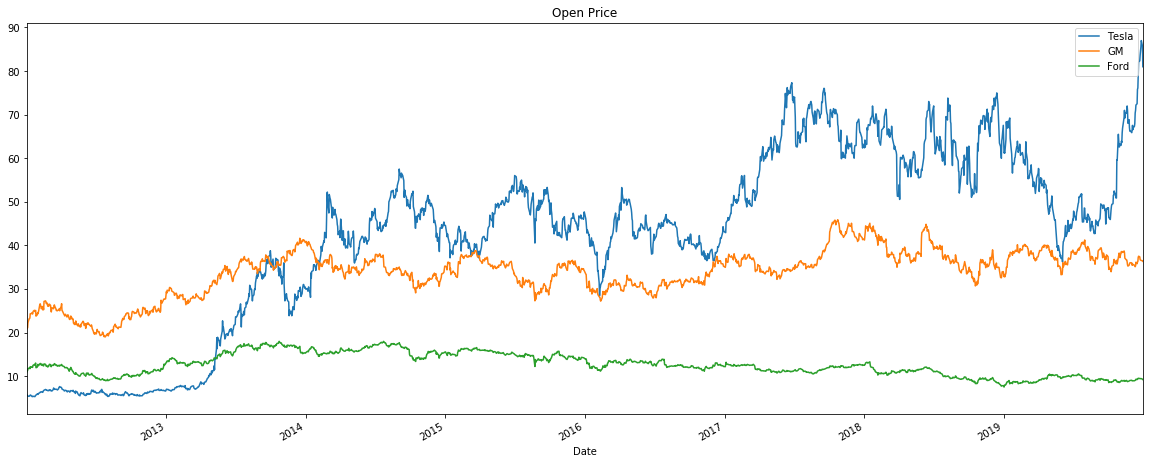

In [20]:
tesla['Open'].plot(label='Tesla',figsize=(20,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

** Plot the Volume of stock traded each day.**

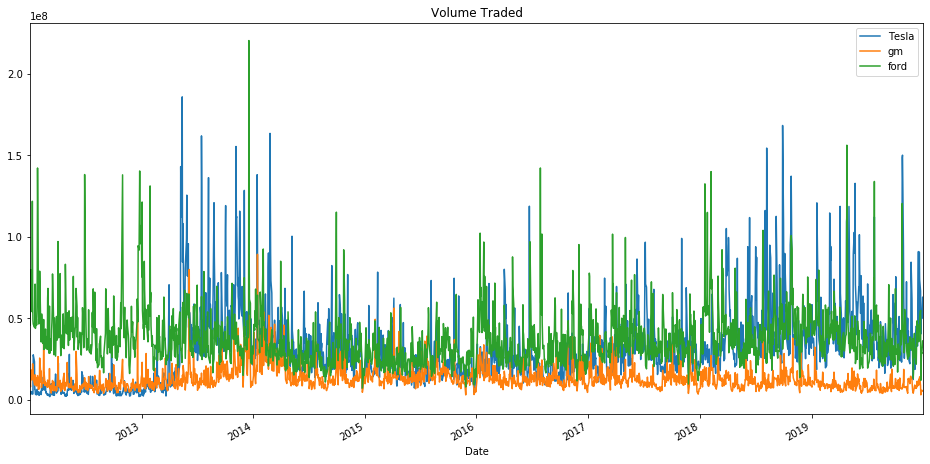

In [21]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**What happened that day?**

In [26]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [16]:
# What happened:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf


____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multiply the 'Volume' column by the 'Open price'. 

Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \\$10 each versus 100000 units of stock at $1 each)

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [30]:
tesla['Total Traded']= tesla['Volume']*tesla['Open']
gm['Total Traded'] = gm['Volume']*gm['Open']
ford['Total Traded'] = ford['Volume']*ford['Open']

Text(0, 0.5, 'Total Traded')

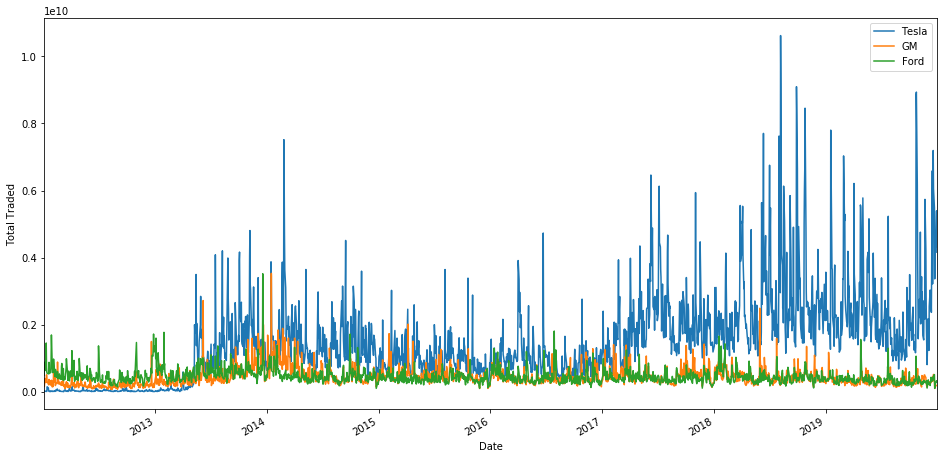

In [31]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in 2018. What date was that and what happened? **

In [33]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

____

**Plotting MA (Moving Averages). Plot out the MA50 and MA200 for GM.**

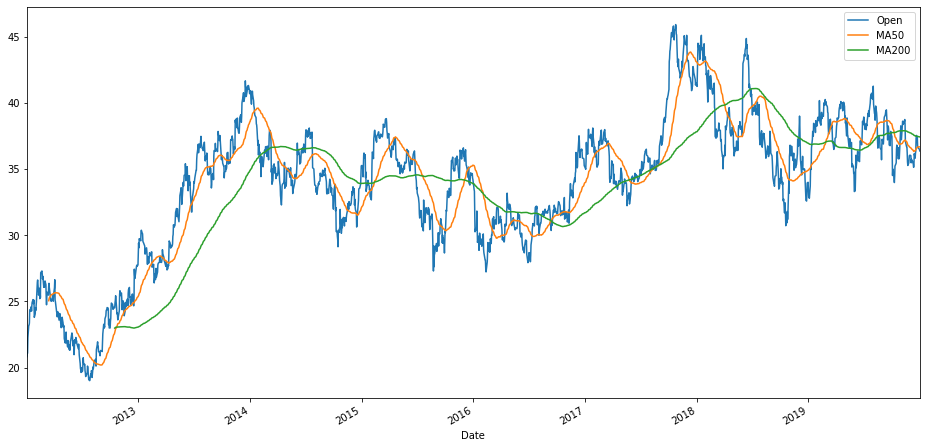

In [34]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. **

In [35]:
from pandas.plotting import scatter_matrix

In [36]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [37]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

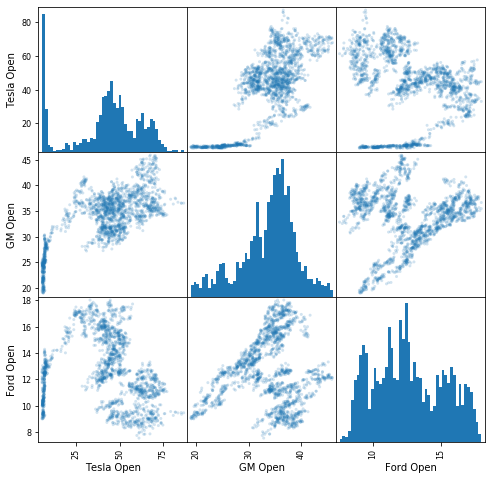

In [38]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# Part 3: Financial Analysis


## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [46]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [47]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [48]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [49]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [50]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [51]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.506940,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.621603,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.817201,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.898138,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.958839,6.386011e+08,0.007686


In [52]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269413,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346701,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135057,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652891,2.803604e+08,NaN,NaN,-0.003490


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

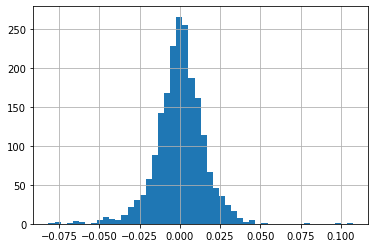

In [53]:
ford['returns'].hist(bins=50)

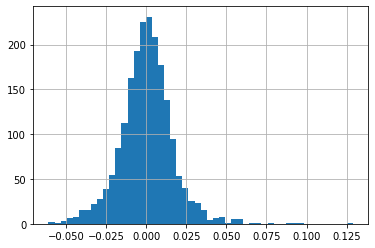

In [54]:
gm['returns'].hist(bins=50)

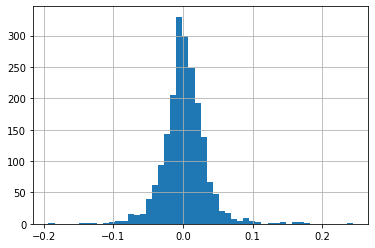

In [55]:
tesla['returns'].hist(bins=50)

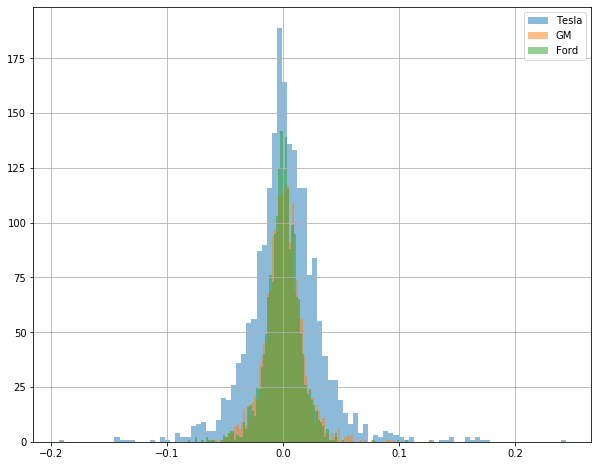

In [56]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

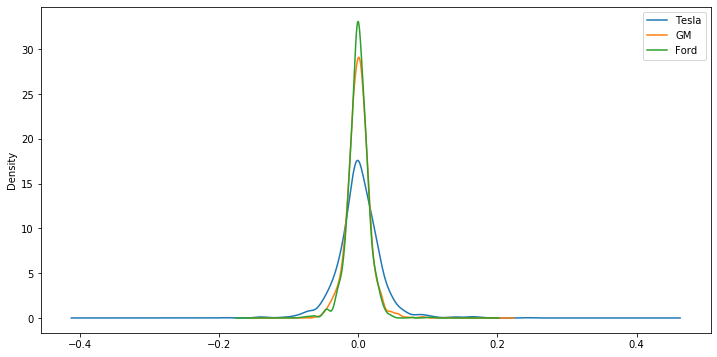

In [57]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** Try also creating some box plots comparing the returns. **

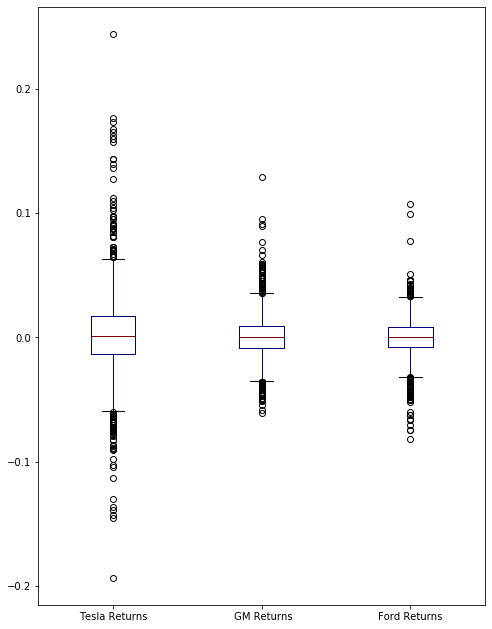

In [58]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

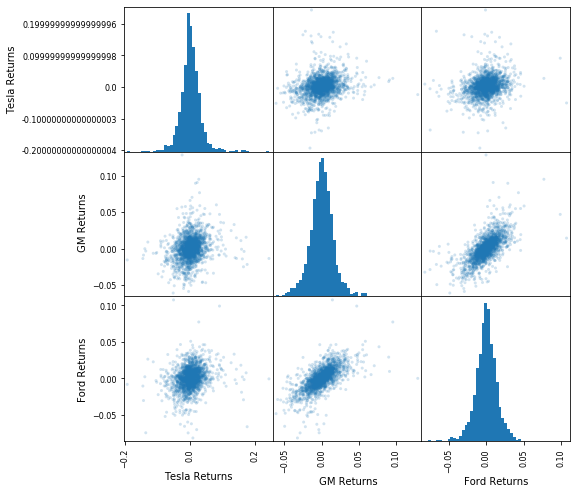

In [59]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

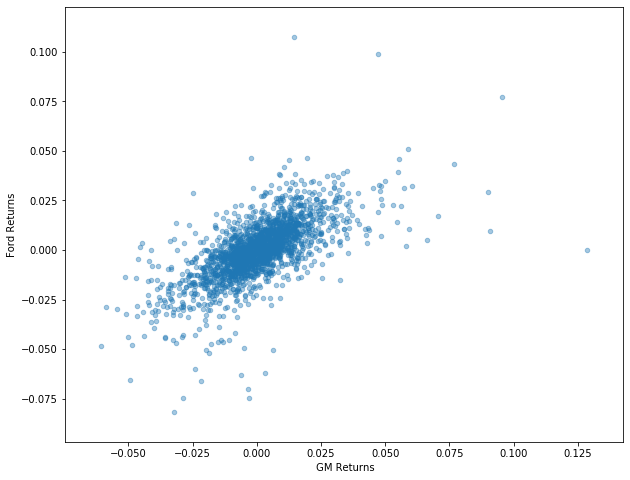

In [60]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [61]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [62]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635,0.970442


In [63]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

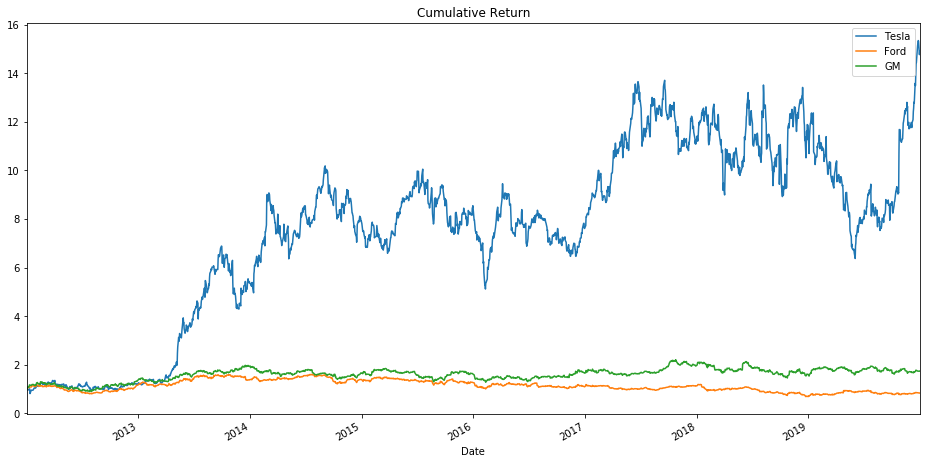

In [64]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

### Thank You